In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Train.csv')

In [3]:
data.head()

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


In [4]:
data['filename'].unique()

array(['L427F01330C01S03961Rp02052.jpg', 'L1083F00930C39S12674Ip.jpg',
       '24_initial_1_1463_1463.JPG', ...,
       'L134F00766C01S09784Rp26034.jpg',
       'L1153F02464C01S00194Rp01561.jpg',
       'L406F00362C01S00614Rp06760.jpg'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            26068 non-null  object
 1   filename      26068 non-null  object
 2   growth_stage  26068 non-null  object
 3   damage        26068 non-null  object
 4   extent        26068 non-null  int64 
 5   season        26068 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [6]:
data.isnull().sum()

ID              0
filename        0
growth_stage    0
damage          0
extent          0
season          0
dtype: int64

In [7]:
data['growth_stage'].unique()

array(['S', 'V', 'M', 'F'], dtype=object)

In [8]:
data['season'].unique()

array(['SR2020', 'SR2021', 'LR2020', 'LR2021'], dtype=object)

In [9]:
data['damage'].unique()

array(['WD', 'G', 'DR', 'ND', 'DS', 'PS', 'WN', 'FD'], dtype=object)

In [10]:
data['extent'].dtype

dtype('int64')

In [11]:
data.shape

(26068, 6)

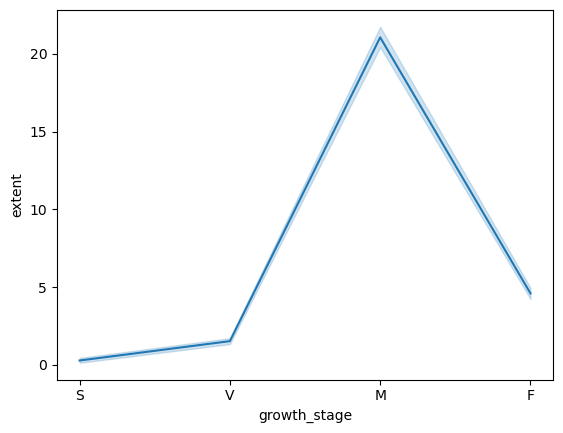

In [12]:
sns.lineplot(data=data, x='growth_stage', y='extent');

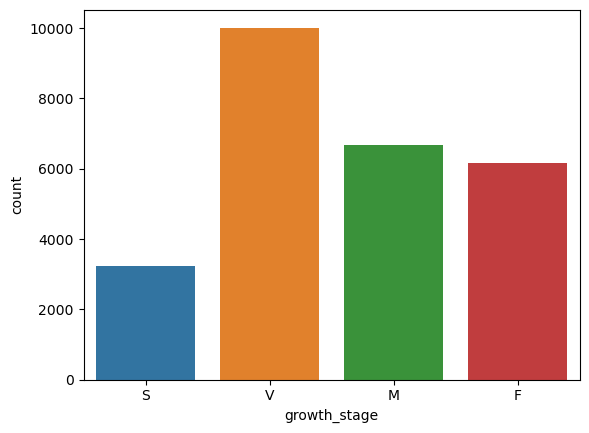

In [13]:
sns.countplot(data=data, x='growth_stage');

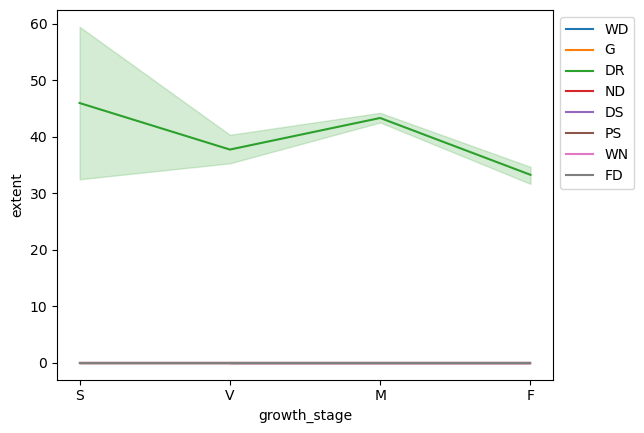

In [14]:
sns.lineplot(data=data, x='growth_stage', y='extent', hue='damage')
plt.legend(bbox_to_anchor = [1,1,0,0]);

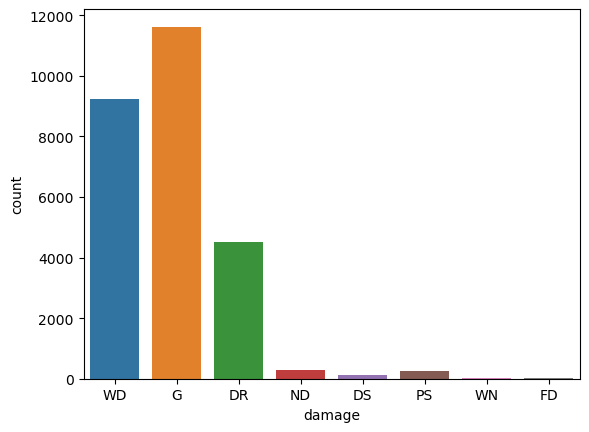

In [15]:
sns.countplot(data=data, x='damage');

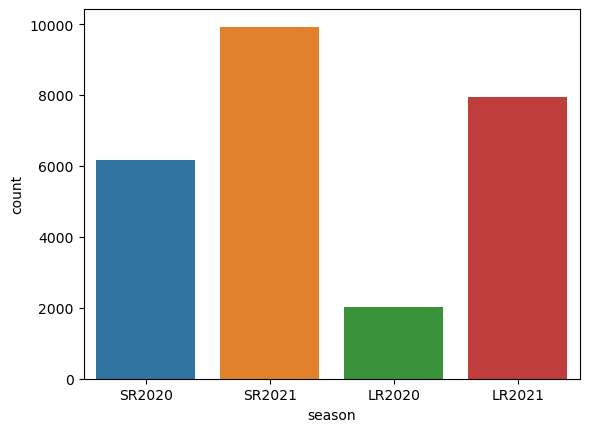

In [16]:
sns.countplot(data=data, x='season');

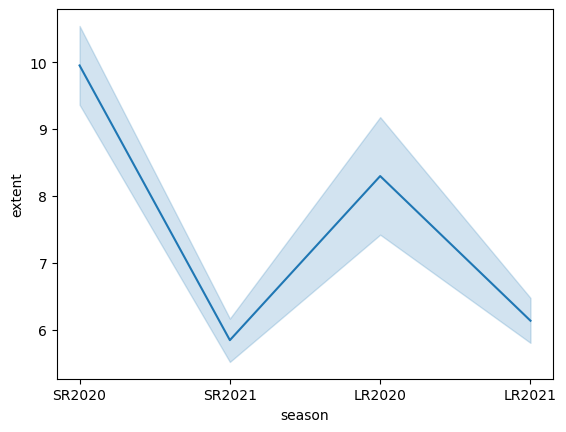

In [17]:
sns.lineplot(data=data, x='season', y='extent');

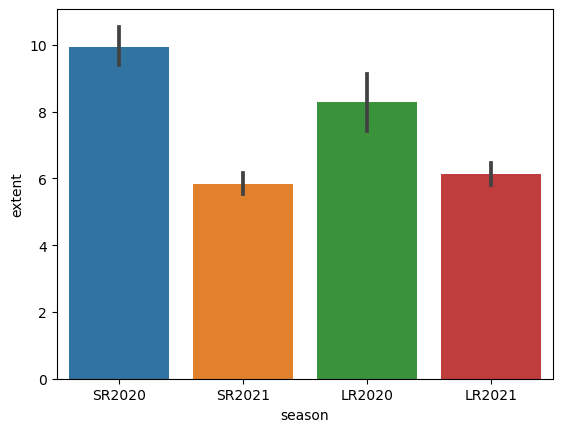

In [18]:
sns.barplot(data=data, x='season', y='extent');

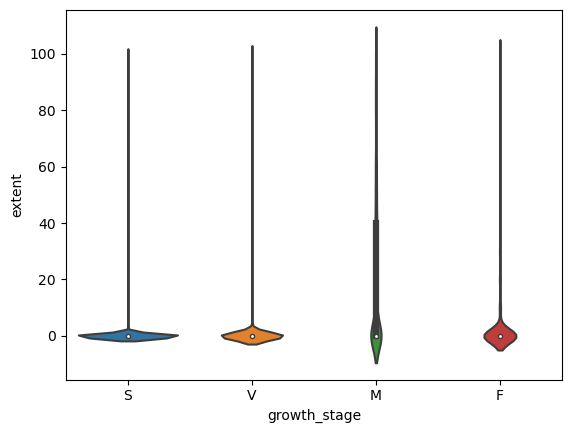

In [19]:
sns.violinplot(data=data, x='growth_stage', y='extent');

In [20]:
data.columns

Index(['ID', 'filename', 'growth_stage', 'damage', 'extent', 'season'], dtype='object')

In [21]:
data =data.drop(['ID','filename'], axis=1)

In [22]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [23]:
categorical_columns

['growth_stage', 'damage', 'season']

In [24]:
df = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [25]:
df.head()

,extent,growth_stage_M,growth_stage_S,growth_stage_V,damage_DS,damage_FD,damage_G,damage_ND,damage_PS,damage_WD,damage_WN,season_LR2021,season_SR2020,season_SR2021
0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,60,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [27]:
# Create the feature matrix 'X' by dropping the 'wickets' column from 'new_df'
X = df.drop('extent', axis=1)

In [28]:
y = df['extent']

In [29]:
# Split the data into training and testing sets
# X_train and y_train will be used for training the model
# X_test and y_test will be used for evaluating the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
import statsmodels.api as sm


# Fit a Zero-Inflated Poisson (ZIP) regression model
zip_model = sm.ZeroInflatedPoisson(y_train, X_train).fit()

# Print the model summary
print(zip_model.summary())

# Make predictions
y_pred = zip_model.predict(X_test)

# Inverse-transform the predictions to get the final results
y_pred = np.expm1(y_pred)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 3.149847
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 45


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                  extent   No. Observations:                20854
Model:             ZeroInflatedPoisson   Df Residuals:                    20841
Method:                            MLE   Df Model:                           12
Date:                 Fri, 03 Nov 2023   Pseudo R-squ.:                 -0.4289
Time:                         02:28:43   Log-Likelihood:                -65687.
converged:                       False   LL-Null:                       -45971.
Covariance Type:             nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
inflate_const     -2.0276        nan        nan        nan         nan         nan
growth_stage_M     1.1646        nan        nan        nan         nan         nan
growth_stage_S     1.2155   

In [92]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)

In [108]:
# XGBoost Regressor
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)
xgb_predictions = xgb_regressor.predict(X_test)

In [109]:
# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_test)

In [110]:
# AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, learning_rate=0.1)
adaboost_regressor.fit(X_train, y_train)
adaboost_predictions = adaboost_regressor.predict(X_test)

In [111]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)

In [112]:
# Evaluate the models
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
adaboost_r2 = r2_score(y_test, adaboost_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [113]:
print("Linear Regression R^2 Score:", linear_reg_r2)
print("XGBoost R^2 Score:", xgb_r2)
print("Gradient Boosting R^2 Score:", gb_r2)
print("AdaBoost R^2 Score:", adaboost_r2)
print("Decision Tree R^2 Score:", dt_r2)

Linear Regression R^2 Score: 0.706818182403802
XGBoost R^2 Score: 0.7401403554495007
Gradient Boosting R^2 Score: 0.7272907475978624
AdaBoost R^2 Score: 0.6645561228016322
Decision Tree R^2 Score: 0.7395727679460501


In [114]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for each model
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
adaboost_rmse = np.sqrt(mean_squared_error(y_test, adaboost_predictions))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))

In [115]:
print("Linear Regression RMSE:", linear_reg_rmse)
print("XGBoost RMSE:", xgb_rmse)
print("Gradient Boosting RMSE:", gb_rmse)
print("AdaBoost RMSE:", adaboost_rmse)
print("Decision Tree RMSE:", dt_rmse)

Linear Regression RMSE: 10.314213209416819
XGBoost RMSE: 9.710397497107715
Gradient Boosting RMSE: 9.947581925923538
AdaBoost RMSE: 11.032591112858368
Decision Tree RMSE: 9.720996476412516


In [116]:
df_pred = pd.DataFrame({'y_true':y_test, 'Linear Regression': linear_reg_predictions,
                   'XGBoost': xgb_predictions, 'Gradient Boosting': gb_predictions, 'AdaBoost': adaboost_predictions,
                   'Decision Tree': dt_predictions})

In [117]:
df_pred.head()

,y_true,Linear Regression,XGBoost,Gradient Boosting,AdaBoost,Decision Tree
1441,30,40.665771,36.093765,39.705558,44.724499,36.090134
2464,0,-0.938201,0.000330,0.207201,0.000000,0.000000
3023,0,-1.917982,0.000753,0.128974,0.000000,0.000000
22605,0,-0.803846,0.001257,0.305245,0.000000,0.000000
25163,0,-0.169716,0.000476,0.128974,0.000000,0.000000


In [118]:
df_pred[df_pred['y_true'] == 0]

,y_true,Linear Regression,XGBoost,Gradient Boosting,AdaBoost,Decision Tree
2464,0,-0.938201,0.000330,0.207201,0.0,0.0
3023,0,-1.917982,0.000753,0.128974,0.0,0.0
22605,0,-0.803846,0.001257,0.305245,0.0,0.0
25163,0,-0.169716,0.000476,0.128974,0.0,0.0
1045,0,1.985612,0.030574,-1.018483,0.0,0.0
...,...,...,...,...,...,...
9710,0,2.334403,0.000705,-0.169045,0.0,0.0
4010,0,0.668277,-0.001828,-1.018483,0.0,0.0
13709,0,-2.194415,0.000631,0.207201,0.0,0.0
12188,0,-1.080279,0.000929,0.243130,0.0,0.0


In [119]:
test_data = pd.read_csv('Test.csv')
test_df = pd.get_dummies(test_data.drop(['ID','filename'],axis=1), drop_first=True)

In [120]:
linear_reg_pred = linear_reg.predict(test_df)
xgb_pred = xgb_regressor.predict(test_df)
gb_pred = gb_regressor.predict(test_df)

In [121]:
test_pred = pd.DataFrame({'Linear Regression': linear_reg_pred,
                   'XGBoost':np.round(xgb_pred), 'Gradient Boosting':gb_pred})

In [122]:
test_pred[test_pred < 0] = 0

In [123]:
final = pd.DataFrame({'ID': test_data['ID'], 'extent':test_pred['XGBoost']})

In [125]:
final.isnull().sum()

ID        0
extent    0
dtype: int64

In [126]:
final.to_csv('final1', index = False)

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Assuming you have a DataFrame with features and the target variable
# For this example, let's assume 'drought_damage_extent' is the target variable
data = pd.read_csv('your_dataset.csv')

# Split the dataset into features (X) and the target variable (y)
X = data.drop('drought_damage_extent', axis=1)
y = data['drought_damage_extent']

# Apply a log transformation to the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Train a Random Forest regressor on the training data
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_transformed = rf_regressor.predict(X_test)

# Inverse-transform the predictions to get the final results
y_pred = np.expm1(y_pred_transformed)

# Evaluate the model's performance on the original scale
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Epoch 1/60
522/522 [==============================] - 8s 3ms/step - loss: 184.5710 - mae: 5.8105 - val_loss: 103.5453 - val_mae: 4.2363
Epoch 2/60
522/522 [==============================] - 1s 2ms/step - loss: 95.7077 - mae: 3.7875 - val_loss: 100.1434 - val_mae: 3.7510
Epoch 3/60
522/522 [==============================] - 1s 2ms/step - loss: 93.3404 - mae: 3.5560 - val_loss: 97.5373 - val_mae: 3.6730
Epoch 4/60
522/522 [==============================] - 1s 2ms/step - loss: 92.5247 - mae: 3.4915 - val_loss: 98.1440 - val_mae: 3.6536
Epoch 5/60
522/522 [==============================] - 1s 2ms/step - loss: 91.8814 - mae: 3.4767 - val_loss: 98.6001 - val_mae: 3.6980
Epoch 6/60
522/522 [==============================] - 1s 2ms/step - loss: 91.7391 - mae: 3.4901 - val_loss: 96.4206 - val_mae: 3.6008
Epoch 7/60
522/522 [==============================] - 1s 2ms/step - loss: 91.4432 - mae: 3.4757 - val_loss: 97.4685 - val_mae: 3.5008
Epoch 8/60
522/522 [==============================] - 1s 2m

In [ ]:
# Create a DataFrame to compare true and predicted values
comparison_df = pd.DataFrame({'true': y_test, 'pred': np.round(predictions.reshape(-1)).astype(int)})